# Diagnosticando câncer de mama a partir de características histológicas


**Neste exercício, treinaremos diferentes modelos de aprendizado de máquina (incluindo uma rede neural) para prever se uma amostra de câncer de mama é maligna ou benigna.**

Nossos modelos usarão recursos extraídos de amostras de mama do [conjunto de dados "Breast Cancer Wisconsin" disponível publicamente](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/download?datasetVersionNumber=2).

Este é um problema de *classificação* porque estamos pedindo ao algoritmo para classificar as amostras em uma de duas classes: **maligno ou benigno**. Treinaremos uma rede neural para esta tarefa. Você será então convidado a experimentar outros algoritmos de classificação, como:

-Floresta Aleatória
- K-vizinhos mais próximos
- máquinas de vetores de suporte (SVMs)

Neste exercício, aprenderemos como:

- **Baixe dados** e **carregue-os em nosso Jupyter Notebook**
- **Importe bibliotecas úteis** como pandas e sci-kit learn
- **Limpe nossos dados**
- **Divida nosso modelo** para treinamento e teste
- **Quantifique o desempenho** do nosso modelo


## Part 1: Downloading and importing our data

Para treinar um modelo de aprendizado de máquina, a primeira coisa que precisamos são de dados.

Existem vários conjuntos de dados de código aberto disponíveis na Internet. Ótimas fontes de conjuntos de dados incluem [Kaggle](https://www.kaggle.com/), [Papers with Code](https://paperswithcode.com/datasets) e [data.world](https://data.world/datasets/health).

Para este exercício, estamos usando um conjunto de dados disponível no Kaggle. Você pode visualizar informações sobre o conjunto de dados e baixá-lo [aqui](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data). (Talvez seja necessário criar uma conta Kaggle, o que definitivamente vale a pena fazer - Kaggle é ótimo.)

*Observação: queremos a versão 2 do conjunto de dados.*

### Baixando e movendo nossos dados

Depois de baixar os dados, procuramos o arquivo *.csv* (pode estar dentro de um arquivo .zip, que precisa ser descompactado). CSV significa ‘valor separado por vírgula’ e significa que cada linha de dados é armazenada com valores separados por vírgulas. Você pode abrir o arquivo em um editor de 'texto simples' (como o Bloco de notas (Windows) ou o TextEdit (Mac)) para ver como fica.

O local onde colocaremos esse arquivo dependerá se estamos executando o Jupyter Notebook localmente ou no Google Colab. Essas opções são discutidas no [exercício de configuração do Jupyter Notebook](https://github.com/chris-lovejoy/CodingForMedicine/blob/main/exercises/Setting_up_Jupyter_Notebook.ipynb).

**Se você estiver usando o Google Colab**, será necessário:

1. Certifique-se de estar conectado a um tempo de execução (clique em Conectar no canto superior direito, se não estiver)
2. Selecione a pasta ‘Arquivos’ na guia esquerda
3. Arraste nosso arquivo 'data.csv' baixado do Breast Cancer para a guia Arquivos (ele deve mostrar o arquivo de upload no canto inferior esquerdo e então você verá 'data.csv' na guia Arquivos).

**Se estiver executando o Jupyter Notebook em seu computador local**, você pode simplesmente:

1. Arraste nosso arquivo ‘data.csv’ para a mesma pasta (também conhecida como diretório) deste Jupyter Notebook.


### Importando a biblioteca 'pandas'

Para carregar nossos dados, usaremos uma biblioteca popular chamada ["Pandas"](https://pandas.pydata.org). Uma biblioteca é uma coleção de código com funções prontas que podemos usar. Podemos importá-lo com uma linha de código e usá-lo para uma ampla gama de funcionalidades.

In [1]:
import pandas as pd

*Se você estiver executando em seu computador local e receber o seguinte erro, significa que você precisa instalar o pandas em seu computador. Instruções para fazer isso estão disponíveis [aqui](https://pypi.org/project/pandas/). Envie-me uma mensagem se houver alguma dificuldade (veja o formulário de mensagem no final deste documento).*


> "ModuleNotFoundError: Nenhum módulo chamado 'pandas'


### Importando nossos dados para o notebook

Assim que tivermos nossos dados no local correto e os pandas importados, podemos carregá-los com o seguinte comando. Isso usa uma das funções *pandas* **read_csv()**, que nos permite carregar arquivos csv e salvá-los como um **'DataFrame'** (que é basicamente uma tabela).

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():


  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 125204 bytes


In [3]:
df = pd.read_csv('data.csv')

Nossa tabela agora deve estar salva na variável ‘df’, para que possamos vê-la executando a célula abaixo.

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Parte 2: Visualizando nossos dados

Antes de começarmos a treinar nosso modelo, é importante entender nosso conjunto de dados. O primeiro passo é ler todas as informações que temos sobre nossos dados. Para alguns projetos, isso pode envolver fazer perguntas a quem forneceu os dados. No nosso caso, há uma descrição útil no Kaggle [aqui](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

A segunda etapa é explorar nós mesmos os dados. Várias funções podem ser úteis para isso.

Vamos começar usando as funções **.head()** e **.tail()** para observar a parte superior e inferior da nossa tabela:

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


**Você pode modificar a função *df.head()* para mostrar as 20 principais entradas?**

Uma função útil para entender cada variável é **.describe()**. Vamos usar isso para examinar radius_mean. Sinta-se à vontade para modificar o código abaixo para entender outras variáveis.

In [7]:
df.radius_mean.describe()

,radius_mean
count,569.000000
mean,14.127292
std,3.524049
min,6.981000
25%,11.700000
50%,13.370000
75%,15.780000
max,28.110000


Existem funções semelhantes para observar diferentes médias, em particular mediana e moda:

In [8]:
df.radius_mean.median()

13.37

In [9]:
df.radius_mean.mode()

,radius_mean
0,12.34


Reserve algum tempo para observar as diferentes variáveis ​​e compreendê-las.

**Execute the line of code below, describe its output and explain how it differs from the previous *.describe()* command**

In [10]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Reserve algum tempo para fazer mais análises, até sentir que realmente entende os dados. Este processo é frequentemente referido como “Análise Exploratória de Dados”, e a busca por guias sobre isso pode fornecer sugestões úteis. Não tenha medo de tentar fazer alguns gráficos/plotagens para ajudar a entender os dados. Aqui estão alguns exemplos de guias, com sugestões de coisas que você pode consultar:
- [Um guia extenso para análise exploratória de dados](https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-análise-ddd99a03199e)
- [Introdução ao EDA - Simplilearn](https://www.simplilearn.com/tutorials/data-analytics-tutorial/exploratory-data-análise)

Pode levar algum tempo para implementá-los na primeira vez, mas com o tempo pode se tornar um processo rápido. Você também pode começar a construir seu próprio painel de funções que reutilizará sempre que trabalhar com um novo conjunto de dados. (Por exemplo, criei meus próprios painéis de funções [aqui](https://github.com/chris-lovejoy/data-science-pipeline) - embora eu esteja usando cada vez mais o chatGPT para escrevê-los).

## Parte 3: Limpando nossos dados

Você deve ter notado uma coluna na extrema direita chamada "Unnamed: 32" e que está cheia de valores "NaN". "NaN" significa 'não é um número' e pode ser causado por várias coisas. Em alguns casos, uma coluna vazia em um arquivo de planilha pode ser selecionada como uma coluna, e todos os valores são ‘NaN’s – esse parece ser o caso aqui.

Podemos remover a coluna usando a função **drop()**:

In [11]:
df = df.drop('Unnamed: 32', axis=1)

Também não estamos preocupados com a coluna 'id'. **Na célula abaixo, solte a coluna 'id'.**

In [12]:
df = df.drop('id', axis=1)

Um problema comum com conjuntos de dados do mundo real são dados ausentes ou valores discrepantes. Podemos verificar o número de valores ausentes com a função isna(). Isso retorna uma tabela que mostra se cada célula é NaN ou não:

In [13]:
df.isna()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


E podemos encontrar o número total de NaNs em cada coluna da nossa tabela usando a célula a seguir. (Veja se você consegue descobrir como funciona.)

In [14]:
sum(df.isna().values)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

O valor de retorno de `df.isna().values` é um array contendo valores booleanos, indicando valores ausentes em cada elemento do DataFrame.

O método sum trata `true` e `false` como `1` e `0` e retorna a contagem total de valores ausentes no DataFrame.

**Adicione alguns valores `NaN` ao DataFrame e verifique se o DataFrame inclui valores `NaN`. Limpe o DataFrame como antes.**

In [15]:
# Adicionar alguns valores `NaN` ao DataFrame e verifique se o DataFrame inclui valores `NaN`. Limpe o DataFrame como antes



It's great to see that there aren't any missing values in our table! We can say that our data is pretty 'clean', so there's not much else for us to do here. With many real-world datasets, there's more to be done here, but we can go on to the next step: preparing our data for training the model.

## Part 4: Preparing our data for model training

### Convertendo para binário

Os computadores gostam muito mais de trabalhar com valores binários de 0 ou 1 do que com texto. Então, vamos converter os valores da nossa coluna de ‘diagnóstico’ de ‘M’ para maligno e ‘B’ para binário em 1 e 0:

In [16]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

O método map substitui cada valor na coluna do dataframe especificado aceitando um dicionário como argumento onde as chaves são os valores originais (`'M'` e `'B'` ) e os valores para substituí-los (`1` e `0`).

Podemos verificar quais valores o ‘diagnóstico’ agora possui com a função **unique()**:

In [17]:
df.diagnosis.unique()

array([1, 0])

O método exclusivo retorna uma matriz de cada valor exclusivo da coluna de diagnóstico. Neste caso, `1` e `0` são os valores únicos.

**Descubra na célula abaixo quantos valores únicos existem na coluna 'Diagnóstico'?**

In [18]:
import pandas as pd
df = pd.read_csv('./data.csv')
df = df.drop('Unnamed: 32', axis=1)
df = df.drop('id', axis=1)
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
print(df['diagnosis'].nunique())

2


Podemos usar o método `nunique` para retornar o número de valores únicos de uma coluna ou linha.

### Criando uma divisão train-test

Precisamos dividir nossos dados em dados de “treinamento” e de “teste”. Fazemos isso para que possamos entender se nosso modelo é realmente útil. No mundo real, queremos usar nosso modelo em dados nunca vistos antes.

Ao treinar o modelo, mostramos apenas os dados de 'treinamento'. Podemos então testá-lo nos dados de 'teste' e usá-los para entender o desempenho do modelo em dados novos (invisíveis).

Vamos usar novamente uma função da biblioteca de aprendizagem do sci-kit.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train, test = train_test_split(df, test_size = 0.15)

A variável `test_size` determina qual proporção de nossos dados é mantida como dados de 'teste'. `0,15` significa que 15% dos dados de teste serão retidos.

Queremos dados de teste suficientes para que possamos avaliar com segurança o desempenho do nosso modelo. Se usássemos apenas, digamos, 5% dos dados para testes, ficaríamos menos confiantes na pontuação final. No entanto, também não queremos usar muitos dados para teste porque o modelo teria menos dados para treinamento, portanto, em última análise, pode ser um modelo menos bom.

Portanto, algo na faixa de ~10% a ~30% é típico. Para conjuntos de dados muito grandes, é possível utilizar uma percentagem mais baixa, porque mesmo uma percentagem baixa ainda contém pontos de dados suficientes para testar o desempenho de forma fiável.


**Crie uma função que aceite os dados de treinamento e teste como argumentos e imprima o tamanho do treinamento e do teste**.

A saída deve ser algo como abaixo, onde Number é o tamanho do conjunto de treinamento.

`O tamanho do conjunto de treinamento: Número `

`O tamanho do conjunto de teste: Número`


In [21]:
def train_test_size(train, test):

train_test_size(train, test)

IndentationError: expected an indented block after function definition on line 1 (<ipython-input-21-adc7b6f829b3>, line 3)

Podemos usar a função `len()` para verificar o tamanho dos conjuntos de dados de treinamento e teste. Veja o código abaixo se você ficar preso na tarefa acima.

In [22]:
def train_test_size(train, test):

  train_size = len(train)
  test_size = len(test)

  print (f'the size of training set : \n{train_size}' )
  print (f'the size of test set : \n{test_size}')

train_test_size(train, test)

the size of training set : 
483
the size of test set : 
86


### Normalizando nossos dados

Em nosso conjunto de dados, diferentes recursos possuem diferentes intervalos de valores. Por exemplo, o valor máximo do recurso 'perimeter_mean' é 188,5, enquanto para o recurso 'smoothness_mean' é 0,1634.

Para alguns modelos de aprendizado de máquina, isso pode afetar o desempenho do modelo porque ele pode se preocupar mais com alterações no recurso maior.

Portanto, é uma prática recomendada “normalizar” os dados, o que envolve colocar tudo no mesmo intervalo. Uma maneira popular de fazer isso é chamada de normalização ‘máx/mínimo’ e move todos os valores para o intervalo de 0 a 1.

Novamente, podemos usar uma **biblioteca** para fazer isso, então não precisamos escrever muito código. Usaremos a biblioteca **sci-kit learn**:

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)

Se olharmos novamente para nossos dados, veremos que todos os valores estão agora entre 0 e 1:

In [25]:
train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,0.246060,0.365573,0.231014,0.133701,0.248262,0.052615,0.055886,0.092525,0.342929,...,0.192458,0.592487,0.170178,0.089117,0.271611,0.059503,0.091454,0.255361,0.222551,0.090122
1,0.0,0.115576,0.614474,0.106903,0.054210,0.258193,0.081594,0.000000,0.000000,0.344444,...,0.091071,0.632328,0.080133,0.035735,0.238592,0.042970,0.000000,0.000000,0.179381,0.096091
2,0.0,0.270671,0.083192,0.256306,0.149099,0.317956,0.107156,0.055347,0.125562,0.264141,...,0.203486,0.139442,0.187808,0.093811,0.397742,0.129435,0.074960,0.282612,0.238518,0.259740
3,0.0,0.312793,0.410213,0.299703,0.177094,0.243116,0.183718,0.095497,0.111971,0.290404,...,0.244397,0.512806,0.235320,0.117062,0.193687,0.141369,0.116054,0.212680,0.173664,0.099698
4,0.0,0.351129,0.584376,0.334877,0.213192,0.156360,0.089421,0.081520,0.090800,0.326768,...,0.265742,0.568014,0.248967,0.135028,0.201611,0.115173,0.117572,0.191168,0.153755,0.062967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,1.0,0.344030,0.406155,0.344413,0.207635,0.411664,0.268232,0.309334,0.292629,0.416667,...,0.283173,0.521912,0.327656,0.151003,0.484911,0.384696,0.414217,0.497251,0.399369,0.304080
479,0.0,0.264991,0.293879,0.249050,0.146554,0.282567,0.058144,0.004362,0.015285,0.321717,...,0.198150,0.314741,0.175059,0.093123,0.215479,0.037789,0.004456,0.030144,0.185295,0.060803
480,0.0,0.210564,0.257017,0.206413,0.107953,0.510698,0.221829,0.047631,0.097282,0.295455,...,0.172536,0.419465,0.160616,0.078107,0.463118,0.147384,0.061565,0.220000,0.200867,0.170012
481,0.0,0.318472,0.303348,0.310552,0.181336,0.420060,0.259535,0.126290,0.197752,0.330303,...,0.255425,0.387308,0.244136,0.126991,0.471043,0.222478,0.154553,0.441237,0.253105,0.231339


*(Se você estiver tendo problemas para baixar a biblioteca e importá-la, você pode pular esta seção e o código ainda será executado - ele simplesmente não fornecerá um resultado tão confiável.)*

**Observação:** A normalização entre instâncias deve ser feita após a divisão dos dados entre o conjunto de treinamento e o conjunto de teste, usando apenas os dados do conjunto de treinamento.

O conjunto de testes desempenha o papel de dados novos e invisíveis, portanto não deve estar acessível na fase de treinamento. Usar qualquer informação do conjunto de testes antes ou durante o treinamento é um potencial **vazamento de dados** que pode causar viés na avaliação de desempenho.

Aplicaremos os parâmetros de normalização obtidos anteriormente do conjunto de treinamento para normalizar o conjunto de teste.

In [26]:
test = pd.DataFrame(scaler.transform(test), columns = test.columns)

In [27]:
test

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,0.279190,0.649645,0.267501,0.157285,0.258193,0.108088,0.145286,0.122478,0.255556,...,0.212024,0.675014,0.191394,0.100890,0.340289,0.130696,0.194808,0.223127,0.159077,0.113997
1,1.0,0.416442,0.446398,0.427821,0.271092,0.567572,0.471363,0.500235,0.495504,0.523232,...,0.436144,0.525896,0.397878,0.267106,0.755002,0.451349,0.587540,0.698969,0.336882,0.460186
2,1.0,0.443419,0.459249,0.450625,0.295610,0.404351,0.392161,0.424719,0.458599,0.563131,...,0.407328,0.540979,0.392898,0.240808,0.464439,0.426124,0.566054,0.772509,0.642421,0.269579
3,0.0,0.206304,0.300981,0.200193,0.105069,0.471879,0.191173,0.100891,0.135599,0.437879,...,0.161508,0.313318,0.143135,0.072110,0.509344,0.126233,0.129712,0.293540,0.294697,0.083891
4,1.0,0.392778,0.429489,0.380969,0.240551,0.342512,0.253945,0.126055,0.170570,0.336869,...,0.351121,0.455606,0.315703,0.193644,0.389157,0.293594,0.289936,0.421306,0.317366,0.279942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.0,0.185480,0.109909,0.172068,0.094719,0.203304,0.042676,0.007247,0.034438,0.192929,...,0.157595,0.175868,0.137756,0.069996,0.303308,0.053992,0.014808,0.135842,0.231224,0.143054
82,0.0,0.225709,0.354075,0.223274,0.117200,0.507990,0.281588,0.160483,0.195400,0.471212,...,0.191747,0.403813,0.191743,0.088159,0.426798,0.157086,0.156230,0.271787,0.315987,0.162862
83,1.0,0.550381,0.356442,0.541151,0.403181,0.377088,0.258293,0.349437,0.404130,0.321717,...,0.475987,0.433694,0.445690,0.299302,0.413590,0.178916,0.275240,0.512027,0.152967,0.125738
84,0.0,0.116191,0.291173,0.110773,0.057306,0.435768,0.112188,0.063555,0.073497,0.225253,...,0.145500,0.369949,0.126401,0.062525,0.410289,0.075298,0.091374,0.173608,0.175241,0.172635


Now for the fun part: training and assessing our model.

## Part 5: Model training

Quando se trata de treinar nosso modelo, primeiro precisamos decidir quais **recursos** o modelo usará. Um recurso é uma propriedade mensurável usada como entrada para um modelo e também pode ser chamada de 'variável' ou 'preditor'. No nosso caso, cada uma das colunas do nosso conjunto de dados pode ser usada como um recurso.

To keep things simple, we'll start by just using three features for our model. Let's make a list of prediction variables below. *(Not sure what a list is? Check out the [Python principles](https://github.com/chris-lovejoy/CodingForMedicine/blob/main/exercises/Python_Principles.ipynb) exercises.)*

In [28]:
prediction_var = ['perimeter_mean', 'compactness_mean', 'concavity_mean']

We can now create our input 'x' variables and our output 'y' variables for the training and test sets:

In [29]:
train_x = train[prediction_var]
train_y = train.diagnosis

test_x = test[prediction_var]
test_y = test.diagnosis

To create our training and test data, we select a subset of the training/test data by passing a list in the square brackets. We only select the columns specified in the list `prediction_var` of the DataFrame.

We'll now import our model. We're going to use the 'MLPClassifier' from sci-kit learn. 'MLP' stands for 'multi-layer perceptron' and is a basic type of neural network. It's one of many models that can be used for **classification** tasks, where we take some inputs and produce an output class (e.g. cancer vs not cancer).

In [30]:
from sklearn.neural_network import MLPClassifier

We can declare our model and its variables as below. Here, we're using a neural network with 2 hidden layers with 5 neurons. We specify that when defining our model, by including `hidden_layer_sizes=(5, 2)`.

In [31]:
model = MLPClassifier(hidden_layer_sizes=(5, 2))

There are other parameters of our model that we can change. These are detailed in the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

For example, we could change the "solver" used for training a model from the "adam" optimiser to "sgd" (stochastic gradient descent) by changing the model definition to the following:

```model = MLPClassifier(solver='sgd', hidden_layer_sizes=(5, 2))```

The different terms may not mean anything to you right now, but use the documentation to change one of the parameters when you define your model below:


In [32]:
model = MLPClassifier(
    hidden_layer_sizes=(5, 2),
    # TODO: add a parameter definition here using the documentation (linked above)
)

Now, finally, we can train our model and generate predictions on our 'test' set.

In [33]:
model.fit(train_x, train_y)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 2))

In [34]:
predictions = model.predict(test_x)

That was it. In two lines of code, we just trained a neural network and used it to make some predictions. We first called **model.fit()** with our training data inputs and outputs, and then we called **model.predict()** on our test data inputs.

In the next section, we'll look at how good the predictions are.

## Part 6: Quantifying performance of our model


### F1 score, accuracy and AUC

A common way to quantify model performance is the F1 score. This tests whether the model is making balanced predictions (and not over-predicting or under-predicting the number of cases of malignant cancer).

The score ranges from 0 to 1, with 0 being really bad and 1 being (suspiciously) perfect.

The equation for F1 score is:

![F1 equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/1bf179c30b00db201ce1895d88fe2915d58e6bfd)



We can calculate it using sci-kit learn modules (noticing a pattern?), as below:

In [35]:
from sklearn.metrics import f1_score

f1_score = f1_score(test_y, predictions)

print("The f1 score is ", "%.2f" %f1_score)

The f1 score is  0.81


Other popular metrics are the overall accuracy and the AUC score:

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

accuracy = accuracy_score(test_y, predictions)
AUC = roc_auc_score(test_y, predictions)

print("The accuracy is ", "%.2f" %accuracy)
print("The AUC is ", "%.2f" %AUC)


The accuracy is  0.85
The AUC is  0.84


For more information on performance metrics and how to interpret them, see [these slides](https://www.chrislovejoy.me/slides/data-science-pipeline/#/38) or [this video](https://www.youtube.com/watch?v=xlrj1iFCYUk).

### The confusion matrix

A helpful way to visualise our results, beyond just single-point scores, is the confusion matrix. This involves plotting actual classes vs predicted classes.

In [37]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_y, predictions)
conf_matrix

array([[45,  4],
       [ 9, 28]])

To better understand this matrix, let's plot it in a more visually-aesthetic way, using the popular visualisation library: [**matplotlib**](https://matplotlib.org).

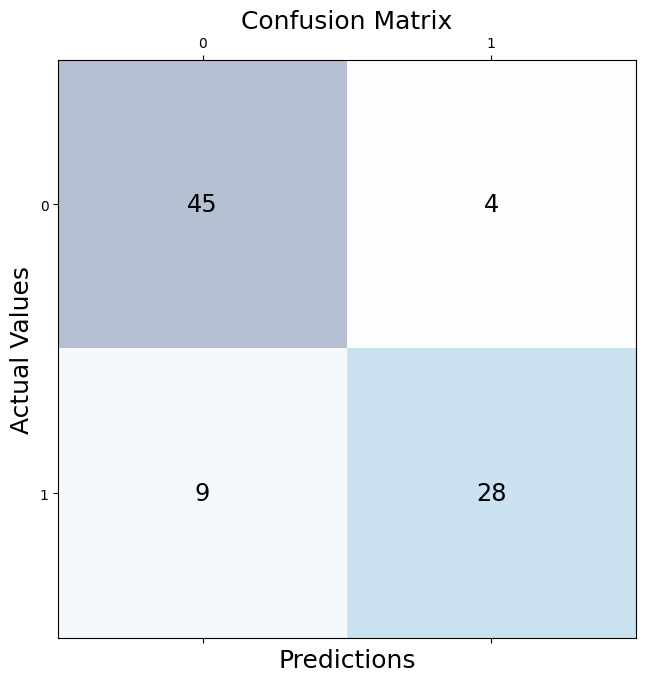

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual Values', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Understanding the code

A valuable 'meta-skill' is knowing how to use tools like [chatGPT](https://chat.openai.com) when trying to understand new code.

If we ask it to explain the code above step-by-step, it gives us the following response:

> Certainly! Let's break down the code step-by-step:
>
> `import matplotlib.pyplot as plt`: This line imports the matplotlib.pyplot module, which provides a MATLAB-like interface for creating visualizations.
>
> `fig, ax = plt.subplots(figsize=(7.5, 7.5))`: This line creates a figure (fig) and an axes object (ax) using the subplots function. The figsize parameter sets the size of the figure to be 7.5 inches by 7.5 inches.
>
> `ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)`: This line displays a matrix plot (matshow) on the axes object ax. It uses the conf_matrix variable as the data to be visualized. The cmap parameter sets the color map to "Blues", and the alpha parameter sets the transparency level to 0.3.
>
> The following two nested for loops iterate over the rows and columns of conf_matrix:
>
> ```for i in range(conf_matrix.shape[0]):```
>
> ```for j in range(conf_matrix.shape[1]):```
>
> Inside the loops, the code performs the following:
>
> `ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')`: This line adds text to the plot at coordinates (j, i). The text value is taken from the corresponding element in conf_matrix. The va and ha parameters set the vertical and horizontal alignment of the text to 'center'. The size parameter sets the font size to 'xx-large'.
> The following lines set labels and title for the plot:
>
> `plt.xlabel('Predictions', fontsize=18)`: Sets the x-axis label to 'Predictions' with a font size of 18.
> `plt.ylabel('Actual Values', fontsize=18)`: Sets the y-axis label to 'Actual Values' with a font size of 18.
> `plt.title('Confusion Matrix', fontsize=18)`: Sets the title of the plot to 'Confusion Matrix' with a font size of 18.
> `plt.show()`: This line displays the plot on the screen.
>
> Overall, the code generates a visual representation of a confusion matrix using matplotlib. The confusion matrix is displayed as a colored matrix plot, with the values of the matrix displayed as text at the corresponding positions. The plot also includes labels for the x-axis, y-axis, and a title.

What do you think? A reasonable explanation?

If any of the explanations are still a bit confusing, use a tool like chatGPT and ask it to clarify further, or in simpler terms.

*(Some of the principles here are covered in the [Python principles](https://github.com/chris-lovejoy/CodingForMedicine/blob/main/exercises/Python_Principles.ipynb) exercises, so consider checking that out for further help too.)*


#### Understanding the confusion matrix

Let's now make sure that we understand the confusion matrix itself.

On the x-axis we have predictions. On the y-axis we have the actual values (ie. whether it's *really* cancerous or not).

Given that, let's consider the following questions:

1. In which boxes is the model creating the right predictions? And where is it making wrong predictions?
2. The consequences of the errors depend on how we're using our model. When we're trying to predict cancer (as in our exercise), which type of error is worse?
3. What's a situation in which the other type of error is worse?


## Next Steps

Have a go at modifying our pipeline, including:

- Different features (using the 'prediction_var' list)
- Different parameters (such as different learning rates and neural network layers or different train/test splits)
- Different models (see below)

**Test yourself to see what is the best performance you can achieve.**

Popular classifiers to try as alternative models include:

- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [K-nearest neighbours](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [Support vector machines (SVMs)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

These links will take you to the documentation. See if you can work out how to import them and then train the model based on the description and examples that they provide.


**Appendix:**

- [Imputing missing values]( https://scikit-learn.org/stable/modules/impute.html#:~:text=Missing%20values%20can%20be%20imputed,for%20different%20missing%20values%20encodings.)


Fill out the form below and we'll provide feedback on your code.

**Any feedback on the exercise? Any questions? Want feedback on your code? Please fill out the form [here](https://docs.google.com/forms/d/e/1FAIpQLSdoOjVom8YKf11LxJ_bWN40afFMsWcoJ-xOrKhMbfBzgxTS9A/viewform).**